#  Découvrez l’algorithme k-means - Exemple avec le dataset Iris

# Summary

Ce notebook est en lien le module sur les approches non supervisées

**Contexte**

- Le dataset Iris est l’un des jeux de données les plus célèbres en apprentissage automatique.

- Collecté par Ronald Fisher (1936).

- Objectif initial : classer des fleurs d’iris selon leur espèce à partir de mesures botaniques.


Nous allons travailler sur le jeu de données iris.


------------------------------
**Contenu du dataset**

Le jeu de données contient 150 observations (fleurs), réparties en 3 espèces :

- Iris Setosa (50 échantillons)
- Iris Versicolor (50 échantillons)
- Iris Virginica (50 échantillons)

Chaque fleur est décrite par **4 variables numériques** (mesures en cm) :

- Sepal length → longueur du sépale 🌱
- Sepal width → largeur du sépale 🌱
- Petal length → longueur du pétale 🌸
- Petal width → largeur du pétale 🌸

=> Les sépales sont les parties vertes qui protègent la fleur, les pétales sont les parties colorées.

# Imports

Importons les librairies

In [73]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Settings

In [2]:
HOME_DIR = Path.cwd().parent

RANDOM_STATE = 42

# Data

Chargeons les données. Nous utiliserons le dataframe `iris`, directement présent dans `scikit-learn`.

Il faudra travailler un peu pour pouvoir l'utiliser correctement. Ne pretez pas trop attention aux lignes ci dessous.

In [36]:
iris = datasets.load_iris(return_X_y=True, as_frame=True)
X = iris[0]
y = iris[1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Clustering

In [37]:
X_scaled = MinMaxScaler().fit_transform(X)

## Kmeans

Nous allons effectuer un clustering avec l'algorithme du k-means.

### Given a spefic cluster number

Testons tout d'abord avec un nombre défini de clusters.

On instancie notre estimateur:



In [38]:
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE)

On l'entraine :

In [39]:
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


On peut calculer son inertie :

In [40]:
kmeans.inertia_

7.122750172943849

### Search K optimal

#### Using the elbow method

Passons à la méthode du coude.

On défini d'abord une liste vide pour sotcker nos inerties:

In [41]:
intertia = []

On défini ensuite la liste du nombre de clusters que l'on veut tester:

In [42]:
k_list = range(2, 10)
list(k_list)

[2, 3, 4, 5, 6, 7, 8, 9]

Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :

In [43]:
for i in k_list :
  kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE)
  kmeans.fit(X_scaled)
  intertia.append(kmeans.inertia_)

Nous obtenons une liste d'inerties :

In [44]:
intertia

[12.127790750538193,
 7.122750172943849,
 5.525760232040968,
 4.98381848444626,
 4.0855060313347815,
 3.5256487658433455,
 3.1800855293632524,
 2.8187364955592997]

Il ne nous reste plus qu'à afficher le resultat :

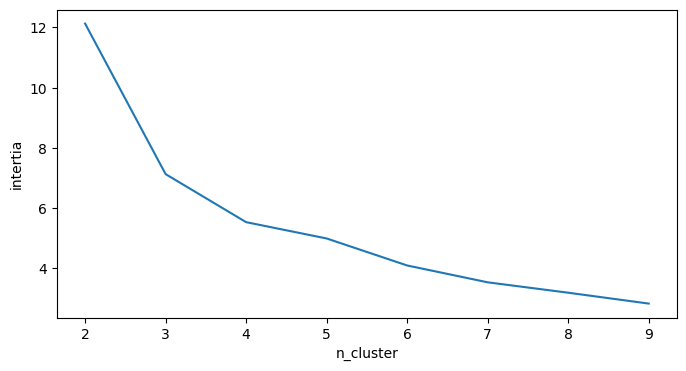

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

#### Silhouette method

In [75]:
from yellowbrick.cluster import KElbowVisualizer


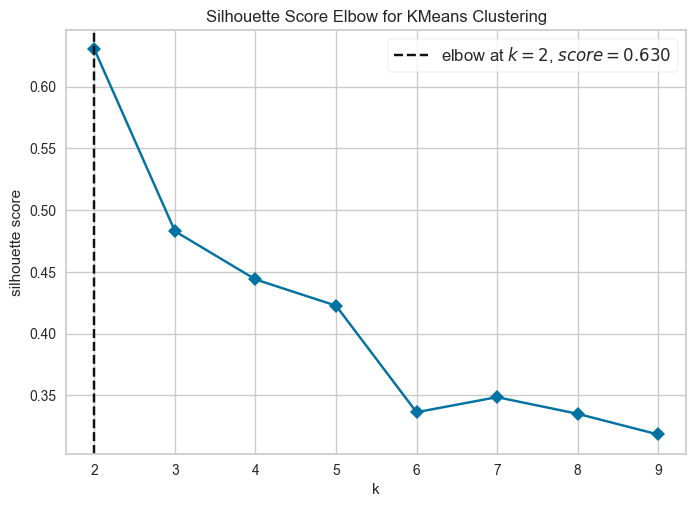

In [77]:
# KMeans + Visualisation avec Silhouette (via Yellowbrick)
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X_scaled)        # Apprentissage sur les données standardisées
visualizer.show();

### Clusters

Regardons maintenant les clusters que nous avons obtenus.

Nous devons d'abord ré-entrainer un estimateur:

In [46]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


Voici les clusters :

In [47]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

-- **ATTENTION** --  
Ici, `0`,`1`,`2` est à considérer comme une **variable catégorielle cardinale**. Il n'y a pas d'ordre entre les clusters.

Le cluster `0` n'est pas *supérieur* au cluster `1` par exemple. Considérez que c'est plus un *id* qu'une *valeur*.






Pour être plus clair, nous allons utiliser des lettres plutôt que des nombres:


In [48]:
dd = {i:j for i,j in enumerate(list("abc"))}
dd

{0: 'a', 1: 'b', 2: 'c'}

In [49]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']

Disons que c'est plus clair maintenant...


Ajoutons nos labels à `X`

In [50]:
X["cluster"] = labels
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,c
1,4.9,3.0,1.4,0.2,c
2,4.7,3.2,1.3,0.2,c
3,4.6,3.1,1.5,0.2,c
4,5.0,3.6,1.4,0.2,c
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,b
146,6.3,2.5,5.0,1.9,b
147,6.5,3.0,5.2,2.0,b
148,6.2,3.4,5.4,2.3,b


Affichons cela de façon graphique :

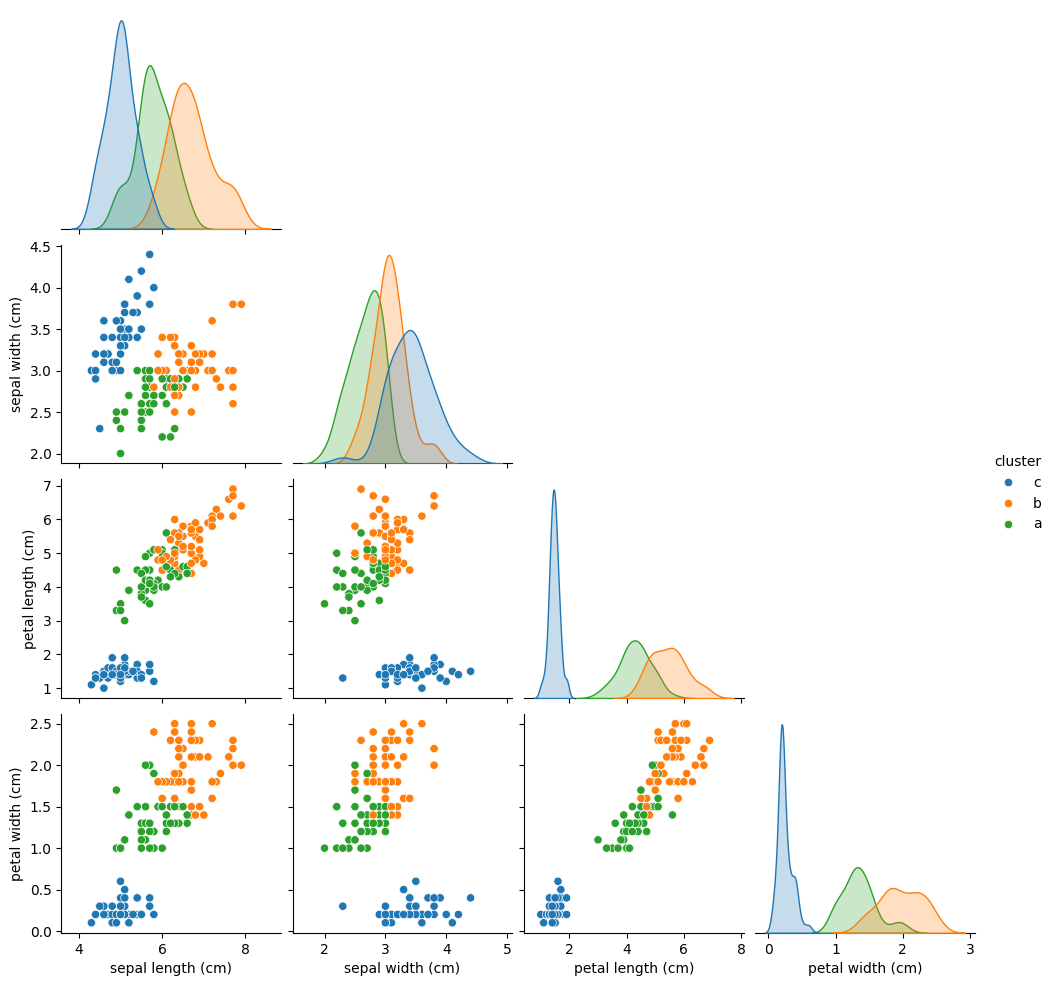

In [51]:
sns.pairplot(X, hue="cluster", corner=True);

#### Performance analysis

## CAH

In [52]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [60]:
# CAH (Clustering hiérarchique ascendant)
Z = linkage(X_scaled, method='ward')

In [61]:
len(Z), len(y), len(X_scaled)

(149, 150, 150)

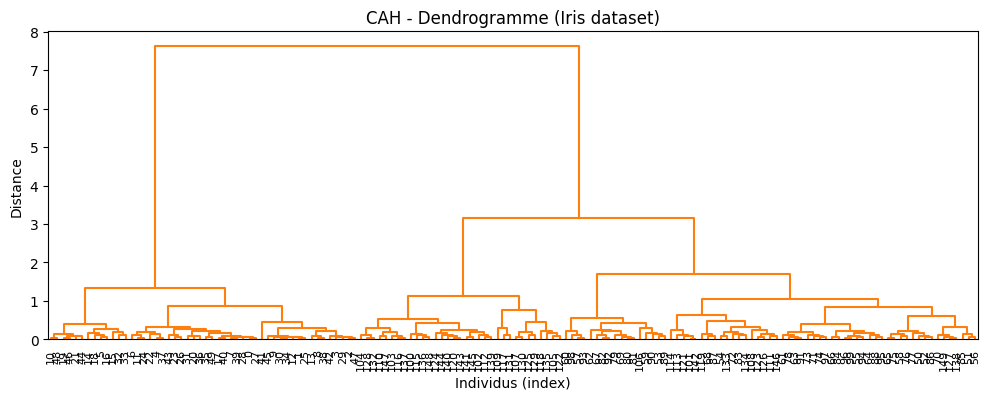

In [66]:
# Affichage du dendrogramme
plt.figure(figsize=(12, 4))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, color_threshold=10)
plt.title("CAH - Dendrogramme (Iris dataset)")
plt.xlabel("Individus (index)")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Exercice: Calculer les scores de silhouette, Davies Bouldin et Calinski

## DBSCAN

In [67]:
from sklearn.cluster import DBSCAN

In [72]:
# DBSCAN sur les données Iris standardisées
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [71]:
dbscan_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Optimisation

In [74]:
eps_values = np.linspace(0.3, 1.0, 8)        # différents eps
min_samples_values = [3, 4, 5, 6, 7, 8]      # différents min_samples

best_score = -1
best_params = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Éviter les cas où tout est bruit ou un seul cluster
        if len(set(labels)) > 1 and -1 not in set(labels):
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {"eps": eps, "min_samples": min_samples}

print("Meilleurs paramètres :", best_params)
print("Score silhouette :", best_score)

Meilleurs paramètres : {'eps': np.float64(0.3), 'min_samples': 3}
Score silhouette : 0.6300471284354711


# Dimension reduction

## ACP

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,b
3,4.6,3.1,1.5,0.2,b
4,5.0,3.6,1.4,0.2,b
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,a
146,6.3,2.5,5.0,1.9,c
147,6.5,3.0,5.2,2.0,a
148,6.2,3.4,5.4,2.3,a


In [19]:
robust_scaler = RobustScaler()
robust_scaler.fit(X.select_dtypes(include="number"))

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


### PCA pour la visualisation

In [20]:
# Réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(robust_scaler.transform(X.select_dtypes(include="number")))

#### Nuage des individus

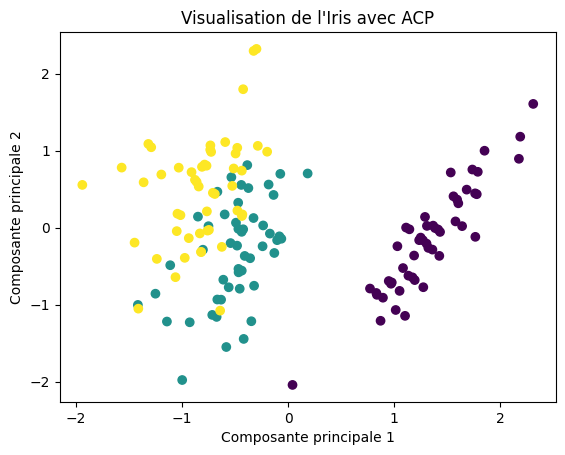

In [21]:
# Visualisation du nuage des individus coloré en fonction du type (y: vrais labels)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Visualisation de l'Iris avec ACP")
plt.show()

### Choix du nombre de composantes

In [22]:
# Réduction de dimensions
pca = PCA(n_components=None)
pca.fit(robust_scaler.transform(X.select_dtypes(include="number")))


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [23]:
# Variance expliquée cumulée
variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
variance_cumsum

array([0.61972166, 0.96729816, 0.99673465, 1.        ])

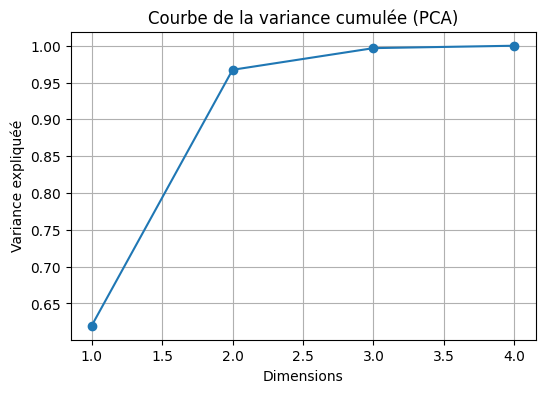

In [25]:
plt.figure(figsize=(6,4))
plt.plot(range(1, len(variance_cumsum) + 1), variance_cumsum, marker='o', linestyle='-')
plt.xlabel("Dimensions")
plt.ylabel("Variance expliquéé")
plt.title("Courbe de la variance cumulée (PCA)")
plt.grid(True)
plt.show()

#### Cercle de corrélation

In [26]:
features = X.select_dtypes(include="number").columns
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [29]:
# Vecteurs propres (ou axes principaux) de l’ACP
pcs = pca.components_ # coordonnées des variables sur les axes factoriels
pcs

array([[-0.44218911,  0.65039111, -0.44733222, -0.42585686],
       [ 0.55495224,  0.73911168,  0.25938473,  0.2801098 ],
       [ 0.67484036, -0.16054637, -0.26163048, -0.67109228],
       [-0.20269999,  0.0702153 ,  0.81496192, -0.53834895]])

- Chaque `ligne` correspond à une composante principale (PC1, PC2, …).
- Chaque `colonne` correspond au poids attribué à une variable initiale dans cette composante.
- Ces `coefficients` indiquent dans quelle direction et avec quelle intensité chaque variable contribue à la composante principale.

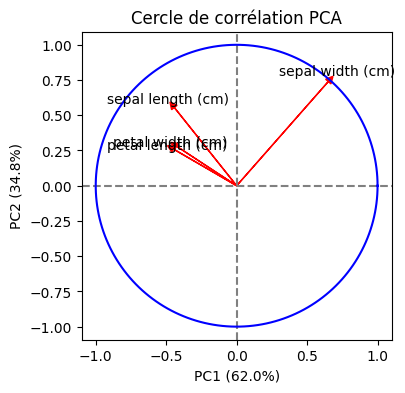

In [33]:
# Cercle de corrélation
plt.figure(figsize=(4, 4))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Cercle unité complet
theta = np.linspace(0, 2 * np.pi, 200)
plt.plot(np.cos(theta), np.sin(theta), color="blue")  # cercle complet

# Vecteurs des variables projetées
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, color='red')
    plt.text(x * 1.1, y * 1.1, features[i], color='black', ha='center', va='center')

plt.xlabel("PC1 (%.1f%%)" % (pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PC2 (%.1f%%)" % (pca.explained_variance_ratio_[1] * 100))
plt.title("Cercle de corrélation PCA")
plt.axis('equal')
plt.show()
